# EBA3500 Exercises 4: Classification, proper scoring rules, and likelihood


# Exercise 1: Minimize and maximize

### (a) Maximum likelihood
Let $y_1, ..., y_n$ be independent $0-1$ variables with success probability $p$. Use differentiation to show that the maximum likelihood estimator of $p$ is $\hat p = \overline{y}$, the mean of $y_1, ..., y_n$. (*Hint*: Find the expression for the likelihood in the lecture notes. Google "differentiation maximization" or something if you have forgotten how to optimize using differentiation.)

### (b) Least squares
Let $y_1, ..., y_n$ be independent variables and $\overline{y}$ be the mean of $y_1, ..., y_n$. Using differentiation, show that $\overline{y}$ minimizes $$m \mapsto \sum_{i=1}^{n}(y_{i}-m)^{2}.$$
In other words, $\sum_{i=1}^{n}(y_{i}-m)^{2}\leq \sum_{i=1}^{n}(y_{i}-\overline {y})^{2}$, no matter what $m$ is.

### (c) Log score
Let $y_1, ..., y_n$ be independent $0-1$ variables with success probability $p$. Show that $\overline{y}$ minimizes the sum of log scores
$$m \mapsto \sum_{i=1}^{n}-y_{i}\log m-(1-y_{i})\log(1-m).$$ (*Hint:* Does this exercise have any relationsship to exercise (a)?)



## Exercise 2: Using the logistic regression
[This page](https://www.geo.fu-berlin.de/en/v/soga/Basics-of-statistics/Logistic-Regression/Logistic-Regression-in-R---An-Example/index.html) works with logistic regression on a particular dataset.



### (a) Download data

Load the data set at https://userpage.fu-berlin.de/soga/200/2010_data_sets/hurricanes.xlsx into a data frame `hurricanes`. Make a `sns.pairplot` and look at the correlation matrix. For more information about the data, look at the link. Some of the correlations are extremely high. Why? (*Hint*: Look at the lecture notes. Be sure to remove columns
that aren't numeric using [`drop`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html). You can use `df.corr()` to calculate the correlation matrix.)

In [4]:
import pandas as pd
hurricanes = pd.read_excel("https://userpage.fu-berlin.de/soga/200/2010_data_sets/hurricanes.xlsx")
hurricanes[1:6]

,RowNames,Number,Name,Year,Type,FirstLat,FirstLon,MaxLat,MaxLon,LastLat,LastLon,MaxInt
1,2,432,NOTNAMED,1944,0,25.6,-74.9,31.0,-78.1,32.6,-78.2,80
2,3,433,NOTNAMED,1944,0,14.2,-65.2,16.6,-72.2,20.6,-88.5,105
3,4,436,NOTNAMED,1944,0,20.8,-58.0,26.3,-72.3,42.1,-71.5,120
4,5,437,NOTNAMED,1944,0,20.0,-84.2,20.6,-84.9,19.1,-93.9,70
5,6,438,NOTNAMED,1944,1,29.2,-55.8,38.0,-53.2,50.0,-46.5,85


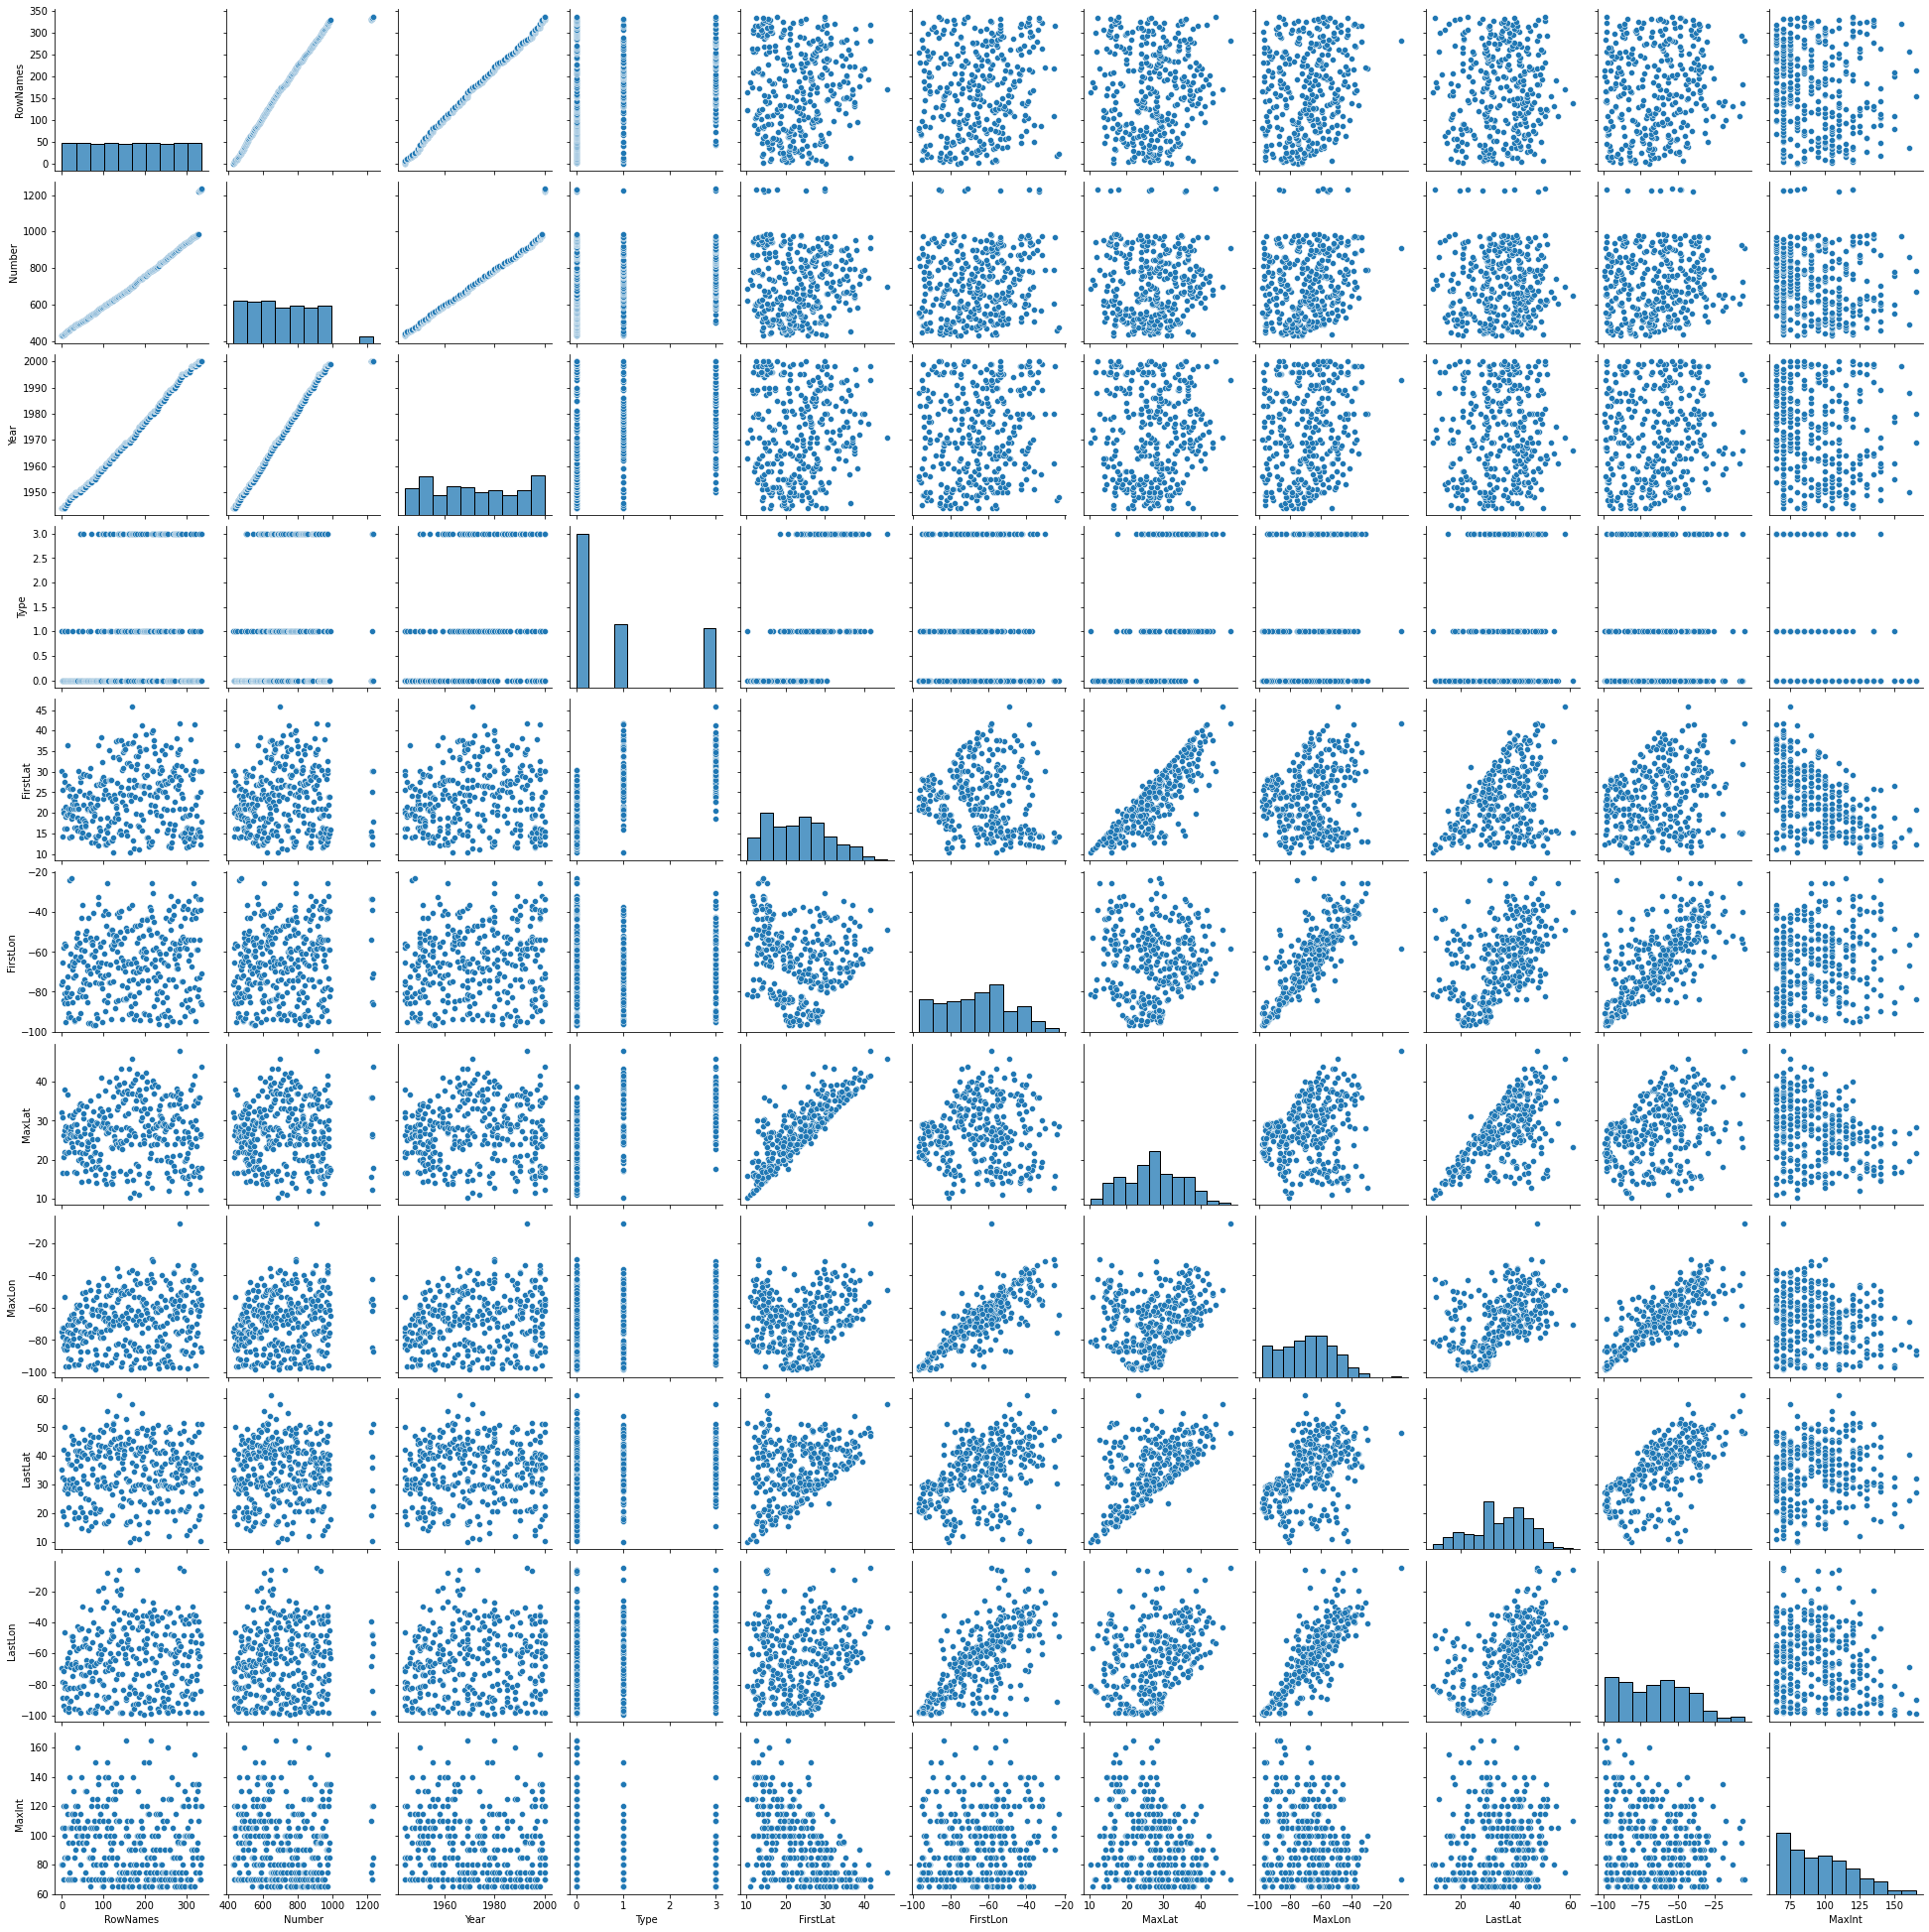

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(hurricanes.drop("Name", axis = 1))
plt.show()

In [13]:
import numpy as np
#np.corrcoef(np.asarray(hurricanes.drop("Name", axis = 1).T)) 
hurricanes.corr()

,RowNames,Number,Year,Type,FirstLat,FirstLon,MaxLat,MaxLon,LastLat,LastLon,MaxInt
RowNames,1.000000,0.979911,0.998707,0.204543,0.066320,0.147655,0.040095,0.208582,0.023992,0.118405,-0.110869
Number,0.979911,1.000000,0.979107,0.180796,0.040343,0.147880,0.030310,0.202266,0.011252,0.109275,-0.104030
Year,0.998707,0.979107,1.000000,0.194502,0.061686,0.146470,0.036905,0.203846,0.023999,0.112338,-0.108181
Type,0.204543,0.180796,0.194502,1.000000,0.662654,-0.067350,0.525167,0.154305,0.159709,0.153903,-0.413241
FirstLat,0.066320,0.040343,0.061686,0.662654,1.000000,-0.136393,0.854849,0.163005,0.369432,0.216586,-0.530203
FirstLon,0.147655,0.147880,0.146470,-0.067350,-0.136393,1.000000,0.018821,0.849398,0.450712,0.712697,0.133285
MaxLat,0.040095,0.030310,0.036905,0.525167,0.854849,0.018821,1.000000,0.223451,0.604356,0.351265,-0.295264
MaxLon,0.208582,0.202266,0.203846,0.154305,0.163005,0.849398,0.223451,1.000000,0.477417,0.849161,-0.158521
LastLat,0.023992,0.011252,0.023999,0.159709,0.369432,0.450712,0.604356,0.477417,1.000000,0.669348,0.071727
LastLon,0.118405,0.109275,0.112338,0.153903,0.216586,0.712697,0.351265,0.849161,0.669348,1.000000,-0.156770


### (b) Correlation plot
The correlation matrix is hard to read. Modify the code from [here](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) or [here](https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e) to make it readable. (*Hint:* Start out with `sns.heatmap(dataframe.corr())`.)

### (c) Fitting a logistic regression
Make a new column in `hurricanes` called `Type.new`. A value in this column equals $0$ if `Type == 0` and $1$ otherwise. Use `sns.lmplot` to plot a logistic regression `"Type_new ~ FirstLat"`. (*Hint:* First make a column `c` that is $1$ if `Type == 0` and $0$ otherwise. Then modify it to be $0$ if `Type == 0` and $1$ otherwise using `1 - c`, or `(1 - 1 * (hurricanes["Type"] == 0))`.)

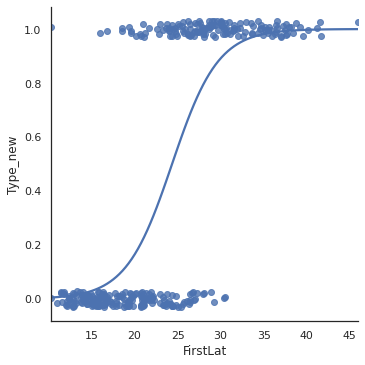

In [64]:
hurricanes["Type_new"] = (1 - 1 * (hurricanes["Type"] == 0))

sns.lmplot(x="FirstLat", y="Type_new", data=hurricanes, y_jitter = .03, logistic = True, ci = None)
plt.show()

### (d) Finding the $R^2$
Fit a logistic and a probit regression model to the data, and report the McFadden $R^2$ values. Are these high or low?

### (e) Finding other predictors
Using the `Type.new` variable as a response, find other reasonable predictors and plot them. (*Hint:* Can you use `hurricanes.corr()` for this?)


## Exercise 3: McFadden's $R^2$

### (a) The McFadden's correlation
The least squares $R^2$ can be modified into a correlation by multiplication with a sign and taking roots. Propose a similar McFadden correlation for binary regression and make a program that calculates it for logistic regression. (*Hint:* The link functions are increasing, hence $F(a+bx)$ is increasing if $b>0$ and decreasing if $b < 0$.)


### (b) The McFadden correlation matrix
Assume the McFadden correlation between two vectors `x` and `y` is calculated by `mcf_corr(x,y)`. What does the following function do? 

In [ ]:
def mystery(df):
  n_columns = len(df.columns)
  n_rows = n_columns
  correlations = np.ones((n_rows, n_columns)) * np.nan
  
  for i in range(n_rows):
    for j in range(n_columns):
      try:
        correlations[i, j] = mcf_corr(df.iloc[:, i].values, df.iloc[:, j].values)
      except:
        None

  return correlations


### (c) Fixing the mystery function
The `mystery` function is not that useful right now. Can you modify it, slightly, to make it more useful? 

## Exercise 4: Link functions
We don't have to use the logistic or probit function, as `statsmodels` support many more. Consult the documentation for `statsmodels` and try out the Cauchy link function and the cloglog link function too, on the data set of

> Indented block


exercise 2. For instance, the probit link would look like:



In [65]:
mod_probit = smf.glm(formula="Type_new ~ FirstLat", data=hurricanes, family=sm.families.Binomial(sm.genmod.families.links.probit())).fit()
print(mod_probit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Type_new   No. Observations:                  337
Model:                            GLM   Df Residuals:                      335
Model Family:                Binomial   Df Model:                            1
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -116.72
Date:                Thu, 16 Sep 2021   Deviance:                       233.44
Time:                        08:34:02   Pearson chi2:                     754.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0284      0.471    -10.671      0.0

The documentation for the link functions is [here.](https://www.statsmodels.org/stable/glm.html#link-functions) It may be hard to get things to run, but persevere.

Now plot the predicted values in the same plot, as we did in the lectures with probit and logit, with different colors for each. Is there i noticable difference in the curves? Is there a noticable difference in the McFadden $R^2$ values?


## Exerise 5: Efficency
I have claimed that the maximum likelihood estimator / log score estimator is superior to the least squares estimator in terms of the asymptotic variance of the estimator. In this exercise, we explore what this means uing simulations.

### (a) Simulation function
Make a function `sim(a, b, x, rng)` that simulates a logistic model with parameters `a,b` and covariates `x`.


In [117]:
rng = np.random.default_rng(seed = 313)
logistic = lambda x: 1/(1 + np.exp(-x))

def sim(a, b, x, rng):
  """ Simulates y from the logistic regression model p = F(a + bx). """
  n = len(x)
  y = rng.binomial(n = 1, size = n, p = logistic(a + b * x))
  return y


### (b) Implementing estimators
Now we proceed to simulating estimators. An estimator is, in this context, a functon that `est(x,y)` that returns an `np.array` with the elements `a` and `b`, the parameters in $F(a + bx)$. (*Hint:* Remember the `values` attribute of a data frame object.) 

In addition to the `probit` estimator below, write a `logit` estimator and a 
logistic regression estimator using `curve_fit`, e.g. `logit_cf`.


In [111]:
def probit(x, y):
  fit = smf.glm(formula="y ~ x", 
          data=pd.DataFrame({'x':x, 'y':y}), 
          family=sm.families.Binomial(sm.genmod.families.links.probit())).fit()
  return fit.params.values

x = np.linspace(-1, 1, 100)
probit(x, sim(1, 2, x, rng)) 

array([0.9568136 , 2.16115886])

In [ ]:

x = np.linspace(-1, 1, 100)
probit(x, sim(1, 2, x, rng)) 

def logit(x, y):
  fit = smf.glm(formula="y ~ x", 
          data=pd.DataFrame({'x':x, 'y':y}), 
          family=sm.families.Binomial()).fit()
  return fit.params.values

def logit_cf(x, y):
  logistic = lambda x, a, b: 1/(1 + np.exp(-(a + b*x)))
  return curve_fit(logistic, x, y)[0]

logit(x, sim(1, 2, x, rng)) 
logit_cf(x, sim(1, 2, x, rng)) 

### (c) Simulate estimates function
Now we want to make a  `sim_estimates` function that simulates the estimators. Let `estimators` be a list of estimators. Complete function below.



In [ ]:
def sim_estimates(estimators, a, b, x, n_reps, rng):
  """ Simulate n_reps logistic regression models (y). Each time, fit every funtion 
  in estimators to x and y. Return the parameter estimates in a suitable array."""
  n_estimators = len(estimators)
  estimates = np.ones((n_reps, 2 * n_estimators))
  for row in range(n_reps):
    # fill in
    for index, estimator in enumerate(estimators):
      # fill in
  return estimates

n_reps = 1000
sims = sim_estimates([logit_cf, logit], 1, 2, x, n_reps, rng)

In [127]:
def sim_estimates(estimators, a, b, x, n_reps, rng):
  """ Simulate n_reps logistic regression models (y). Each time, fit every funtion 
  in estimators to x and y. Return the parameter estimates in a suitable array."""
  n_estimators = len(estimators)
  estimates = np.ones((n_reps, 2 * n_estimators))
  for row in range(n_reps):
    y = sim(a, b, x, rng)
    for index, estimator in enumerate(estimators):
      estimates[row, (2*index):(2*index + 2)] = estimator(x, y)
  return estimates

n_reps = 1000
sims = sim_estimates([logit_cf, logit], 1, 2, x, n_reps, rng)

### (d) Simulate the variances and mean squared errors
Use `n_reps = 10000` to simulate the variances nad mean squared error for `logit`, `probit`, and `logit_cf`. Which estimator is best?
*Hint:* Remember `np.apply_along_axis`? Use that together with `np.var`. The mean squared error is defined as `np.mean((a_hat - a)**2)`, where a is the true parameter value and `a_hat` is the estimator. It is the most common measure of estimator quality, with smaller numbers being better.


In [128]:
np.apply_along_axis(func1d = np.var, axis = 0, arr = sims)

array([0.82233881, 1.73413207, 0.08666364, 0.27199317])

### (e) Make histogram of estimates
Use `n_reps = 10000` and make histograms of all the estimators in a nice grid, so you can compare them easily. 